# Lesson 3 Assignment - Wine Classifier

## Author - Studentname

### Instructions
Your task for this assignment:  Design a simple, low-cost sensor that can distinguish between red wine and white wine.
Your sensor must correctly distinguish between red and white wine for at least 95% of the samples in a set of 6497 test samples of red and white wine.

Your technology is capable of sensing the following wine attributes:
- Fixed acidity  
- Free sulphur dioxide
- Volatile acidity  
- Total sulphur dioxide
- Citric acid  
- Sulphates
- Residual sugar  
- pH
- Chlorides  
- Alcohol
- Density




## Tasks
1. Read <a href="https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/WineQuality.pdf">WineQuality.pdf</a>.
2. Use the RedWhiteWine.csv or RedWhiteWine.arff that is provided.
Note: If needed, remove the quality attribute, which you will not need for this assignment.
3. Build an experiment using Naive Bayes Classifier.

Answer the following questions:
1. What is the percentage of correct classification results (using all attributes)?
2. What is the percentage of correct classification results (using a subset of the attributes)?
3. What is the AUC of your model?
4. What is the best AUC that you can achieve?
5. Which are the the minimum number of attributes? Why?


In [2]:
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/RedWhiteWine.csv"

In [3]:
# Import libraries
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


## Read the data, take a quick look

In [4]:
wine_data = pd.read_csv(URL)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [10]:
print(wine_data.dtypes)
print(wine_data.shape)
a = wine_data['Class']
print(" Count of reds(1) and whites(0)\n",a.value_counts())
print(wine_data.describe())

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Class                     int64
dtype: object
(6497, 13)
 Count of reds(1) and whites(0)
 0    4898
1    1599
Name: Class, dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000   

## Scale the data 


In [12]:
num_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                'sulphates', 'alcohol']
 
scaled_features = {}
for each in num_features:
    mean, std = wine_data[each].mean(), wine_data[each].std()
    scaled_features[each] = [mean, std]
    wine_data.loc[:, each] = (wine_data[each] - mean)/std

print(wine_data.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean   -4.956684e-15     -1.823982e-15  2.433195e-16    1.879587e-15   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.634386e+00     -1.577208e+00 -2.192664e+00   -1.017956e+00   
25%    -6.288845e-01     -6.661100e-01 -4.722972e-01   -7.657389e-01   
50%    -1.660764e-01     -3.016707e-01 -5.940918e-02   -5.135217e-01   
75%     3.738663e-01      3.664680e-01  4.911081e-01    5.584015e-01   
max     6.698910e+00      7.533774e+00  9.230570e+00    1.268585e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean   1.042656e-15         1.248569e-15         -3.173030e-16 -3.905688e-16   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.342536e+00        -1.6

## Now that things are normalized, let's get a training data set

In [14]:
msk = np.random.rand(wine_data.shape[0]) <= 0.8
## remove the quality column and set as separate 
class_data = wine_data['Class']
wine_d = wine_data.drop(['quality', 'Class'],axis = 1)
wine_train = wine_d.iloc[msk, 0:11]
wine_train_target = class_data.loc[msk]
wine_test = wine_d.iloc[~msk, 0:11]
wine_test_target = class_data.loc[~msk]


print(wine_train.describe())
print("wine train target is \n", wine_train_target.describe())
print(wine_test_target.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5164.000000       5164.000000  5164.000000     5164.000000   
mean        0.003608         -0.000677     0.012470       -0.004928   
std         0.998734          1.000907     0.998054        0.993507   
min        -2.634386         -1.577208    -2.192664       -1.017956   
25%        -0.628884         -0.666110    -0.472297       -0.765739   
50%        -0.166076         -0.301671    -0.059409       -0.513522   
75%         0.373866          0.366468     0.491108        0.558401   
max         6.467506          7.533774     9.230570       12.685846   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5164.000000          5164.000000           5164.000000  5164.000000   
mean     -0.002658             0.000674             -0.007844    -0.004158   
std       0.998122             1.005270              0.998817     1.002471   
min      -1.342536            -1.663455         

## Now for the actual fitting - using all the data

### I imagine that the various acids are not independent, nor are the sulfur dioxodes - but we'll see

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
##sklearn.metrics.auc(x, y, reorder=False)
gnb = GaussianNB()
gnb_model = gnb.fit(wine_train, wine_train_target)
y_pred = gnb_model.predict(wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((wine_test.shape[0] - float(misclassified_points))/wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Number of mislabeled points out of a total 1333 points : 35
Accuracy = 97.37
[0.         0.02758621 1.        ]
[0.         0.97798742 1.        ]
AUC = 0.975


## Pretty Good, but let's see if we can cut down on the variables

### Let's just use the fixed acidity and the total sulfur dioxide of the acids and dioxides

In [55]:
cutdown_wine_train = wine_train.drop(['volatile acidity', 'citric acid', 'free sulfur dioxide'], axis = 1)
cutdown_wine_test = wine_test.drop(['volatile acidity', 'citric acid', 'free sulfur dioxide'], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['fixed acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Number of mislabeled points out of a total 1333 points : 48
Accuracy = 96.40
[0.         0.02758621 1.        ]
[0.         0.93710692 1.        ]
AUC = 0.955


## Not an improvement

### Let's look at the relative acidity and total sulfur dioxide - plus pH, density, residual sugar, chlorides, sulfites and alcohol

In [56]:
cutdown_wine_train = wine_train.drop(['fixed acidity', 'citric acid', 'free sulfur dioxide','volatile acidity'], axis = 1)
cutdown_wine_test = wine_test.drop(['fixed acidity', 'citric acid', 'free sulfur dioxide', 'volatile acidity'], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Number of mislabeled points out of a total 1333 points : 50
Accuracy = 96.25
[0.         0.02955665 1.        ]
[0.         0.93710692 1.        ]
AUC = 0.954


## Also not an improvement over all the variables

### Let's remove the cholorides from the same as above

In [58]:
cutdown_wine_train = wine_train.drop(['fixed acidity', 'citric acid', 'free sulfur dioxide','volatile acidity',
                                      'chlorides'], axis = 1)
cutdown_wine_test = wine_test.drop(['fixed acidity', 'citric acid', 'free sulfur dioxide', 'volatile acidity',
                                   'chlorides', ], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['residual sugar', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Number of mislabeled points out of a total 1333 points : 44
Accuracy = 96.70
[0.         0.01477833 1.        ]
[0.         0.90880503 1.        ]
AUC = 0.947


## Tiny improvement, but not as good as all variables

### Let's look at fixed acidity, total sulfur, density, residual sugar, sulfites and alcohol (removing pH)


In [59]:
cutdown_wine_train = wine_train.drop([ 'citric acid', 'free sulfur dioxide','volatile acidity',
                                      'chlorides', 'pH'], axis = 1)
cutdown_wine_test = wine_test.drop([ 'citric acid', 'free sulfur dioxide', 'volatile acidity',
                                   'chlorides',  'pH'], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['fixed acidity', 'residual sugar', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
Number of mislabeled points out of a total 1333 points : 41
Accuracy = 96.92
[0.         0.01280788 1.        ]
[0.         0.91194969 1.        ]
AUC = 0.950


In [61]:
cutdown_wine_train = wine_train.drop([ 'citric acid', 'free sulfur dioxide','volatile acidity',
                                      'chlorides', 'pH', 'density'], axis = 1)
cutdown_wine_test = wine_test.drop([ 'citric acid', 'free sulfur dioxide', 'volatile acidity',
                                   'chlorides', 'pH', 'density'], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['fixed acidity', 'residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol']
Number of mislabeled points out of a total 1333 points : 81
Accuracy = 93.92
[0.        0.0453202 1.       ]
[0.         0.88993711 1.        ]
AUC = 0.922


In [63]:
cutdown_wine_train = wine_train.drop([ 'fixed acidity', 'free sulfur dioxide','volatile acidity',
                                      'chlorides'], axis = 1)
cutdown_wine_test = wine_test.drop([ 'fixed acidity', 'free sulfur dioxide', 'volatile acidity',
                                   'chlorides'], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['citric acid', 'residual sugar', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Number of mislabeled points out of a total 1333 points : 42
Accuracy = 96.85
[0.         0.01576355 1.        ]
[0.         0.91823899 1.        ]
AUC = 0.951


## Let's take a look at the correlation matrix of the full set of variables

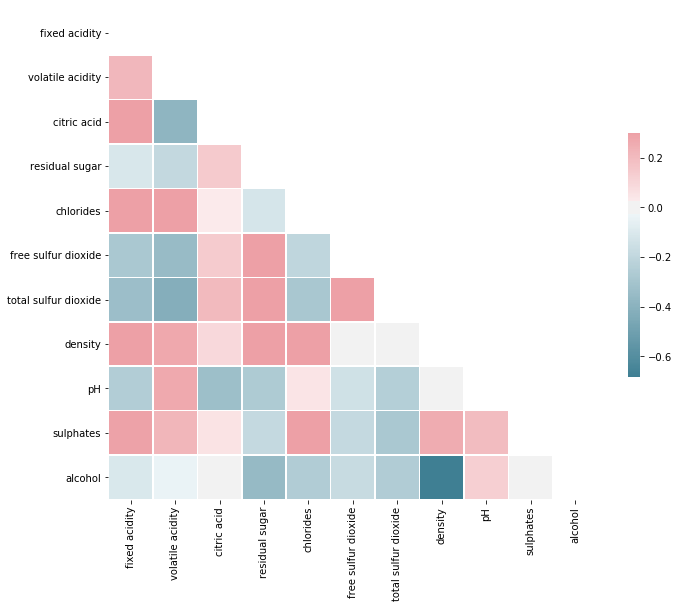

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
corry = wine_train.corr()

# Generate a mask for the upper triangle - basic code borroewd from seaborn examples website
mask = np.zeros_like(corry, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corry, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Looks like density and alcohol have a strong negative correlation - so I'll see if we can get good results dropping one of them.

### I'll drop density


In [66]:
cutdown_wine_train = wine_train.drop(['density'], axis = 1)
cutdown_wine_test = wine_test.drop(['density'], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
Number of mislabeled points out of a total 1333 points : 47
Accuracy = 96.47
[0.         0.04137931 1.        ]
[0.         0.98427673 1.        ]
AUC = 0.971


## Ok, let's see if there's improvement in only dropping alcohol


In [67]:
cutdown_wine_train = wine_train.drop(['alcohol'], axis = 1)
cutdown_wine_test = wine_test.drop(['alcohol'], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
Number of mislabeled points out of a total 1333 points : 35
Accuracy = 97.37
[0.         0.02758621 1.        ]
[0.         0.97798742 1.        ]
AUC = 0.975


## This is the same as using all variables - so preferrable as a model since few variables are better to resist overfitting


### Take a look at removing fixed acidity, since it has moderate correlation with citric acid, sulfates and density

In [69]:
cutdown_wine_train = wine_train.drop(['alcohol', 'fixed acidity'], axis = 1)
cutdown_wine_test = wine_test.drop(['alcohol', 'fixed acidity'], axis = 1)
gnb = GaussianNB()
gnb_model = gnb.fit(cutdown_wine_train, wine_train_target)
y_pred = gnb_model.predict(cutdown_wine_test)
misclassified_points = (wine_test_target != y_pred).sum()
print("Variables are\n", list(cutdown_wine_train))
print("Number of mislabeled points out of a total %d points : %d"\
      % (cutdown_wine_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((cutdown_wine_test.shape[0] - float(misclassified_points))/cutdown_wine_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(wine_test_target, y_pred)
print(fpr)
print(tpr)
print("AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
Number of mislabeled points out of a total 1333 points : 38
Accuracy = 97.15
[0.         0.03054187 1.        ]
[0.         0.97798742 1.        ]
AUC = 0.974


## All variables except alcohol had the same AUC as 